<a href="https://colab.research.google.com/github/gdnsjf/educational-work/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Используя данные попробуйте обучить модель SARIMA для всех трех наборов данных. Подберите наилучшие коэффициенты сам стоятельно или используя метод autoarima.

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00


Dataset 1:
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -531.033
Date:                              Thu, 20 Jun 2024   AIC                           1072.066
Time:                                      14:38:46   BIC                           1087.315
Sample:                                  01-01-1962   HQIC                          1078.260
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6062      0.905      1.775      0.076      -0.168       3.380
ar.L1   

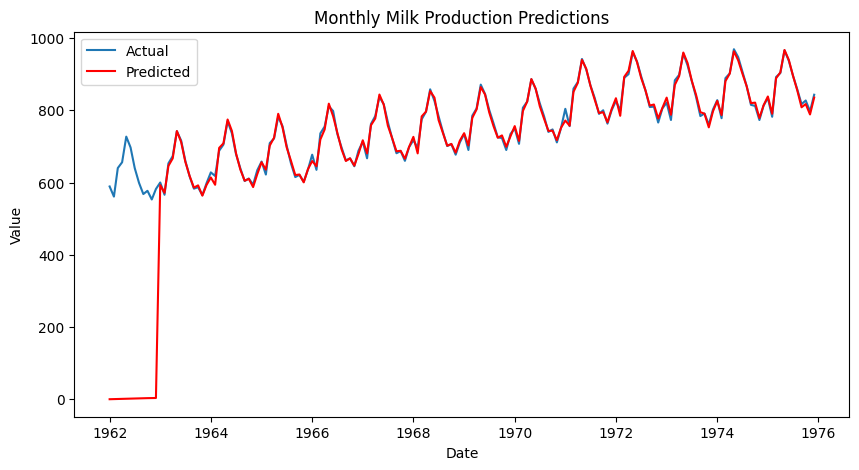


Dataset 2:
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Thu, 20 Jun 2024   AIC                           1017.847
Time:                                     14:38:57   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          

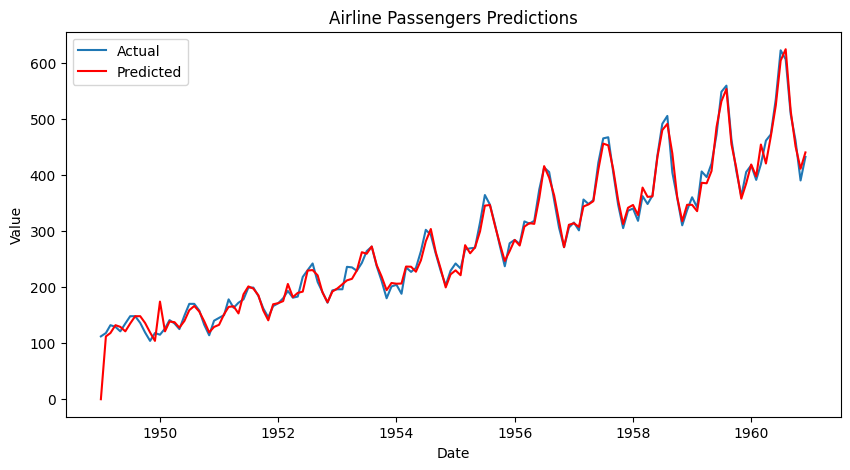


Dataset 3:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  159
Model:             SARIMAX(4, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -779.478
Date:                            Thu, 20 Jun 2024   AIC                           1574.956
Time:                                    14:40:41   BIC                           1599.457
Sample:                                01-01-1978   HQIC                          1584.906
                                     - 03-01-1991                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4652      0.275      1.694      0.090      -0.073       1.004
ar.L2          0.2505  

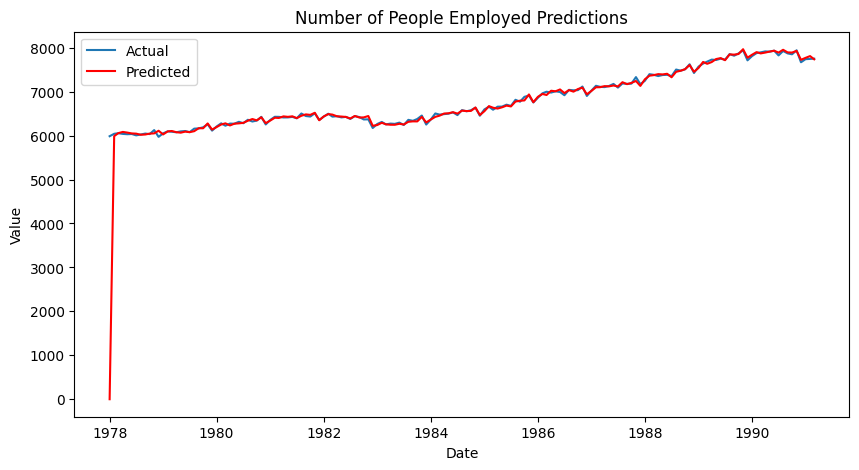

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Отключение специфических предупреждений
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=Warning)
# Чтение датасетов
datasets = [
    pd.read_csv('milk_production.csv'),
    pd.read_csv('AirPassengers.csv'),
    pd.read_csv('aus_employment.csv')
]

# Функция для тренировки модели SARIMA и получения предсказаний
def train_sarima(data, date_column, value_column):
    data[date_column] = pd.to_datetime(data[date_column])
    data.set_index(date_column, inplace=True)
    model = pm.auto_arima(data[value_column], seasonal=True, m=12, stepwise=True, suppress_warnings=True)
    print(model.summary())

    # Обучение модели SARIMAX на всем датасете
    sarima_model = SARIMAX(data[value_column], order=model.order, seasonal_order=model.seasonal_order).fit(disp=False)
    predictions = sarima_model.predict(start=0, end=len(data)-1)

    # Оценка модели
    mse = mean_squared_error(data[value_column], predictions)
    mae = mean_absolute_error(data[value_column], predictions)
    r2 = r2_score(data[value_column], predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")

    return sarima_model, predictions

# Функция для визуализации предсказаний
def plot_predictions(data, predictions, title, date_column, value_column):
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data[value_column], label='Actual')
    plt.plot(data.index, predictions, label='Predicted', color='red')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Переименование столбцов для каждого набора данных
datasets[0].columns = ['Index', 'Month', 'Monthly milk production (pounds per cow)']
datasets[1].columns = ['Month', '#Passengers']
datasets[2].columns = ['date', 'people_employed']

# Тренировка и визуализация для каждого набора данных
for idx, data in enumerate(datasets):
    if idx == 0:
        date_col = 'Month'
        value_col = 'Monthly milk production (pounds per cow)'
        title = 'Monthly Milk Production Predictions'
    elif idx == 1:
        date_col = 'Month'
        value_col = '#Passengers'
        title = 'Airline Passengers Predictions'
    elif idx == 2:
        date_col = 'date'
        value_col = 'people_employed'
        title = 'Number of People Employed Predictions'

    print(f"Dataset {idx+1}:")
    sarima_model, predictions = train_sarima(data, date_col, value_col)
    plot_predictions(data, predictions, title, date_col, value_col)
    print()
